# Real World Data Sets

In [23]:
sp500 = np.genfromtxt('/Users/djpassey/Data/rescomp/all_stocks_5yr.csv', delimiter=',')
sp500 = sp500[1:, 1:-1]

In [24]:
sp500[:10, :10]

array([[1.50700e+01, 1.51200e+01, 1.46300e+01, 1.47500e+01, 8.40750e+06],
       [1.48900e+01, 1.50100e+01, 1.42600e+01, 1.44600e+01, 8.88200e+06],
       [1.44500e+01, 1.45100e+01, 1.41000e+01, 1.42700e+01, 8.12600e+06],
       [1.43000e+01, 1.49400e+01, 1.42500e+01, 1.46600e+01, 1.02595e+07],
       [1.49400e+01, 1.49600e+01, 1.31600e+01, 1.39900e+01, 3.18799e+07],
       [1.39300e+01, 1.46100e+01, 1.39300e+01, 1.45000e+01, 1.56280e+07],
       [1.43300e+01, 1.45600e+01, 1.40800e+01, 1.42600e+01, 1.13544e+07],
       [1.41700e+01, 1.42600e+01, 1.31500e+01, 1.33300e+01, 1.47252e+07],
       [1.36200e+01, 1.39500e+01, 1.29000e+01, 1.33700e+01, 1.19221e+07],
       [1.35700e+01, 1.36000e+01, 1.32100e+01, 1.35700e+01, 6.07140e+06]])

In [26]:
np.sum(np.isnan(sp500))

27

In [22]:
import pandas as pd
import os

In [27]:
df = pd.read_csv('/Users/djpassey/Data/rescomp/all_stocks_5yr.csv')

In [34]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [37]:
stock = pd.read_csv("/Users/djpassey/Data/rescomp/individual_stocks_5yr/A_data.csv")
stock.shape

(1259, 7)

In [40]:
datadir = "/Users/djpassey/Data/rescomp/individual_stocks_5yr/"
opens = ()
for f in os.listdir(datadir):
    stock = pd.read_csv(datadir+f)
    try:
        opens += (np.array(stock["open"]),)
    except KeyError:
        pass

In [41]:
fulltime = [st for st in opens if st.shape[0] == 1259]

In [51]:
U = np.vstack(fulltime).T

In [50]:
U.shape

(470, 1259)

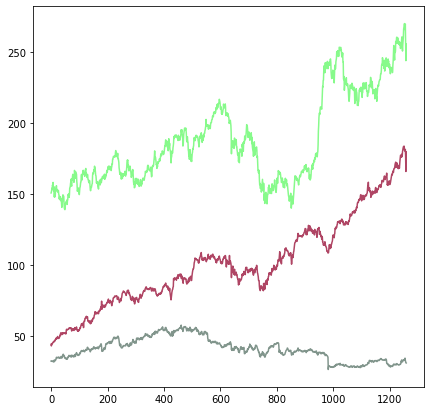

array([[0.50460941, 0.58618917, 0.54730298],
       [0.53128036, 0.98122915, 0.54346093],
       [0.68797111, 0.272513  , 0.39206614]])

In [57]:
rc.plot2d(U[:,:3], np.arange(1259))

In [58]:
people = pd.read_csv("/Users/djpassey/Data/rescomp/pedestrian_traffic_data/tracks.csv")

In [59]:
people.head()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.640310,5.405751e+06,None,None,None,None,None,None,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.792078,5.405751e+06,None,None,None,None,None,None,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.943847,5.405751e+06,None,None,None,None,None,None,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.095616,5.405751e+06,None,None,None,None,None,None,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.256935,5.405751e+06,None,None,None,None,None,None,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."


In [62]:
ids = people["oid"].unique()

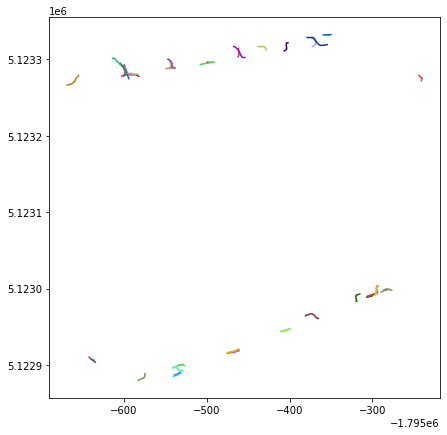

In [114]:
for i in ids:
    track = people[people["oid"] == i]
    x = np.array(track["x"])
    y = np.array(track["y"])
#     x = x - x[0]
#     y = y - y[0]
#     x1, y1 = x[1], y[1]
#     theta = np.arctan(-y1/x1)
#     if x1 < 0:
#          theta += np.pi
    plt.plot(*rotate(x, y, theta=theta), c=np.random.rand(3))
plt.show()

In [102]:
R = lambda x: np.array([[np.cos(x), -np.sin(x)],[np.sin(x), np.cos(x)]])

def rotate(x, y, theta=None):
    T = np.vstack((x,y))
    if theta is None:
        theta = np.arctan(-y[1]/x[1])
    Trot = R(theta) @ T
    return Trot[0,:], Trot[1, :]


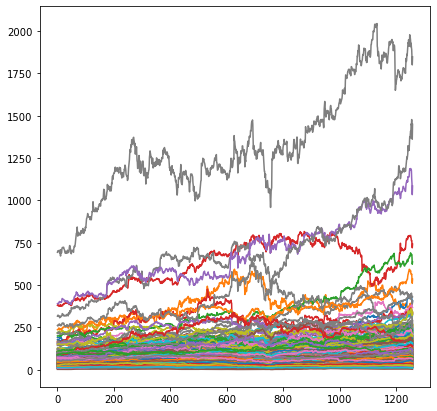

In [117]:
plt.plot(U)
plt.show()